In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.core import Flatten, Dense, Dropout, Lambda


Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

BATCH_SIZE = 64
PATH="data/"

def get_fit_sample():
    gen = image.ImageDataGenerator()
    sample_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=False, batch_size=1000)
    imgs, labels = next(sample_batches)
    return imgs

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
val_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
batches = gen.flow_from_directory(PATH+'train', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

# from utils import plots
#imgs,labels = next(batches)
#plots(imgs[:2])


Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 24000 images belonging to 2 classes.


In [3]:


CLASSES = 2
INPUT_SHAPE = (224,224,3)
model = Sequential()
    
# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Classification block
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax', name='predictions'))

from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=0.0005, momentum=0.9, nesterov=False)


model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/25
1000/1000 [==============================] - 1378s - loss: 0.2352 - acc: 0.5810 - val_loss: 0.2127 - val_acc: 0.6471
Epoch 2/25
1000/1000 [==============================] - 1374s - loss: 0.1946 - acc: 0.6914 - val_loss: 0.2010 - val_acc: 0.6869
Epoch 3/25
1000/1000 [==============================] - 1374s - loss: 0.1592 - acc: 0.7659 - val_loss: 0.1581 - val_acc: 0.7571
Epoch 4/25
1000/1000 [==============================] - 1374s - loss: 0.1262 - acc: 0.8219 - val_loss: 0.1135 - val_acc: 0.8469
Epoch 5/25
1000/1000 [==============================] - 1374s - loss: 0.1007 - acc: 0.8608 - val_loss: 0.0949 - val_acc: 0.8600
Epoch 6/25
1000/1000 [==============================] - 1375s - loss: 0.0816 - acc: 0.8896 - val_loss: 0.0770 - val_acc: 0.8990
Epoch 7/25
1000/1000 [==============================] - 1374s - loss: 0.0681 - acc: 0.9092 - val_loss: 0.0699 - val_acc: 0.9020
Epoch 8/25
1000/1000 [==============================] - 1373s - loss: 0.0590 - acc: 0.9220 - val_loss: 0

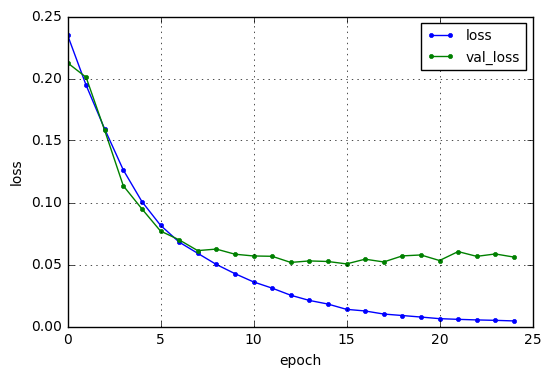

CPU times: user 6h 6min 41s, sys: 55min 54s, total: 7h 2min 35s
Wall time: 9h 34min 11s


In [4]:
%%time
hist = model.fit_generator(batches,  steps_per_epoch=1000, epochs=25, validation_data=val_batches, validation_steps=1000)
 
model.save('ConvNet-D-vgg16-large-dataset.h5')

# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = hist.history['loss']
val_loss = hist.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
%%time
# Prediction

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
test_batches = gen.flow_from_directory(PATH+'test', target_size=(224,224), 
           class_mode=None, shuffle=False, batch_size=BATCH_SIZE)
print(test_batches.samples)

preds = model.predict_generator(test_batches, test_batches.samples / BATCH_SIZE, verbose=1)



Found 1000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
12500
196/195 [==============================] - 59s    
CPU times: user 29.9 s, sys: 2.25 s, total: 32.1 s
Wall time: 1min 2s


In [35]:
import bcolz
#https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L175
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
    
print(preds.shape)
filenames = test_batches.filenames
print(filenames[:5])
%mkdir -p data/results
save_array(PATH  + 'results/test_preds.dat', preds)
save_array(PATH + 'results/filenames.dat', filenames)

(12500, 2)
['unknown/4049.jpg', 'unknown/11042.jpg', 'unknown/769.jpg', 'unknown/8045.jpg', 'unknown/3315.jpg']


In [68]:
isdog = preds[:,1]

print("Raw Predictions: " + str(our_predictions[:5]))
print("Raw Predictions: " + str(isdog[:5]))
print("Mid Predictions: " + str(len(isdog[(isdog < .6) & (isdog > .4)])))
print("Edge Predictions: " + str(len(isdog[(isdog == 1) | (isdog == 0)])))


Raw Predictions: [  7.32483896e-09   1.00000000e+00   3.00929503e-04   1.09451648e-08
   3.29333858e-08]
Raw Predictions: [  1.00000000e+00   1.72287010e-14   9.99699116e-01   1.00000000e+00
   1.00000000e+00]
Mid Predictions: 128
Edge Predictions: 940


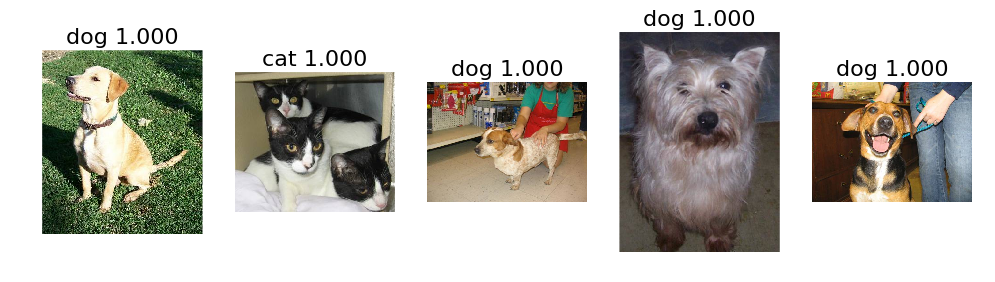

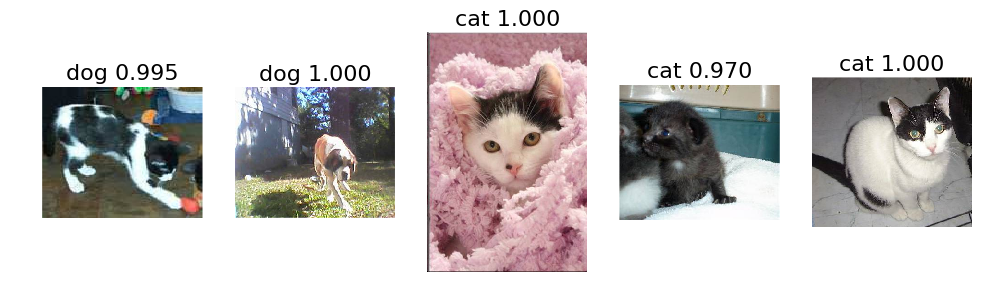

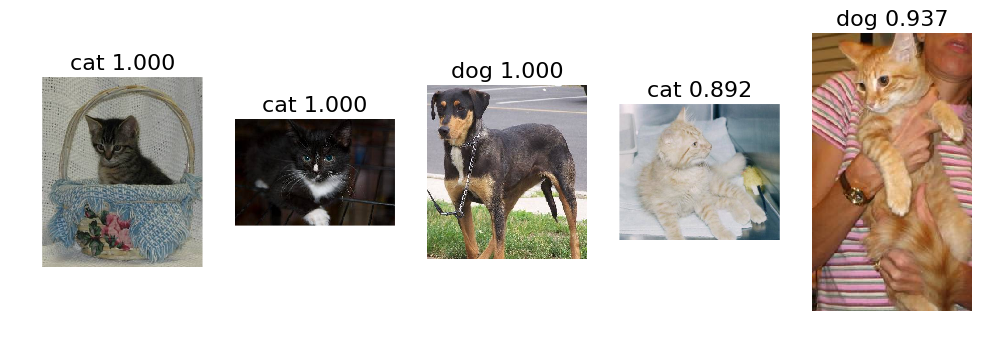

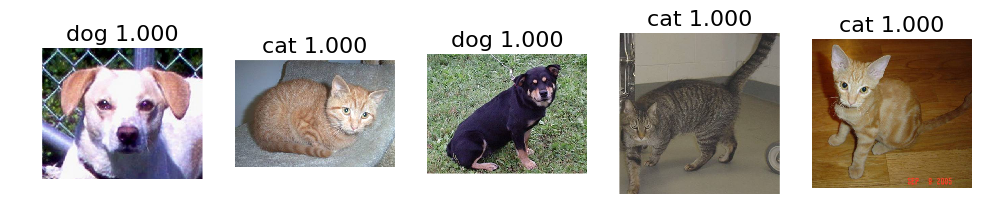

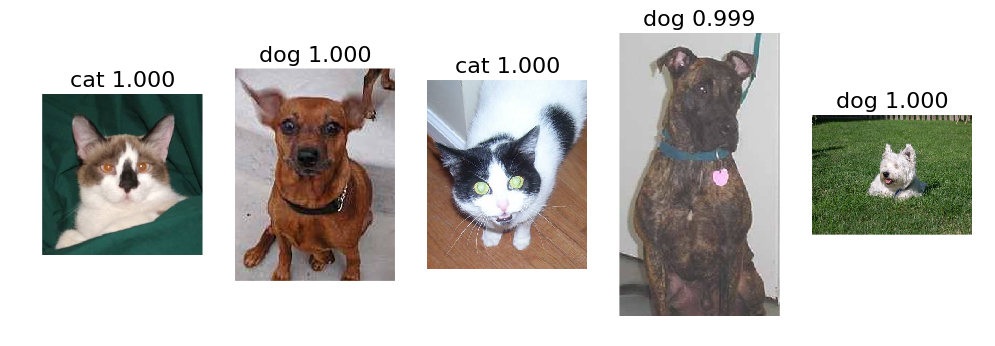

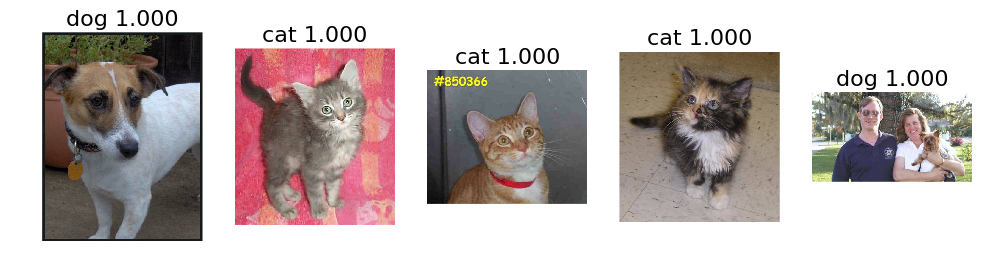

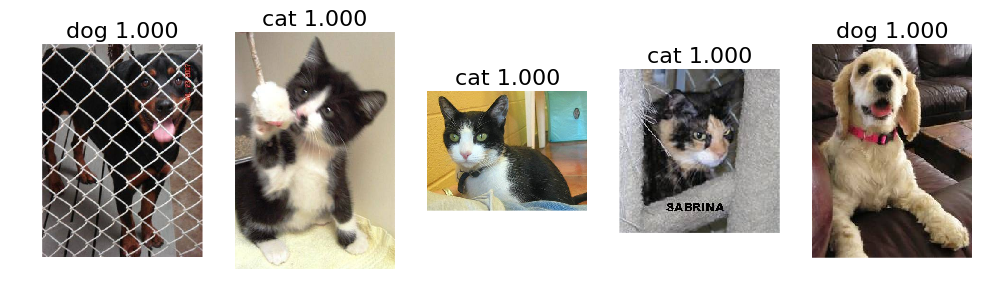

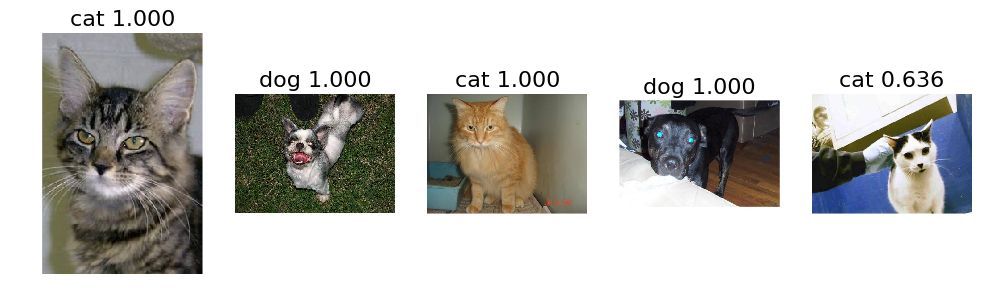

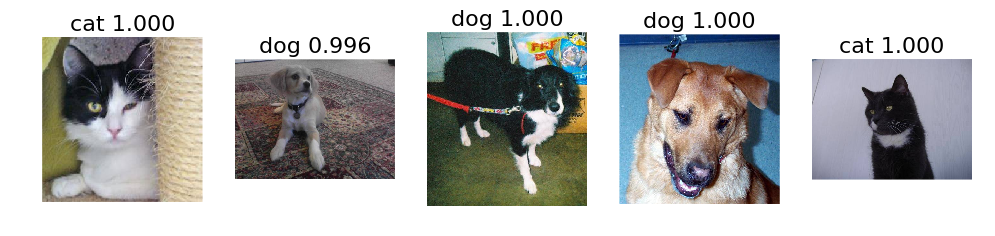

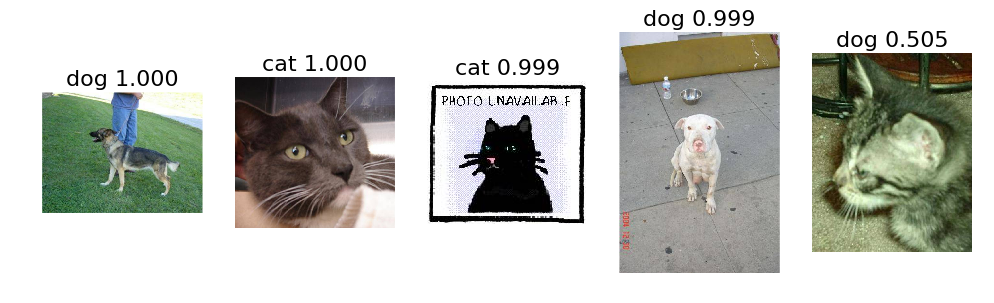

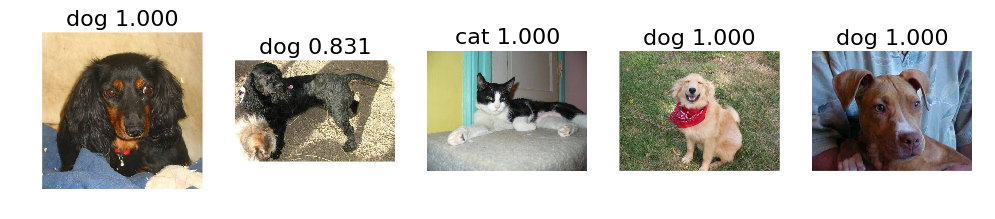

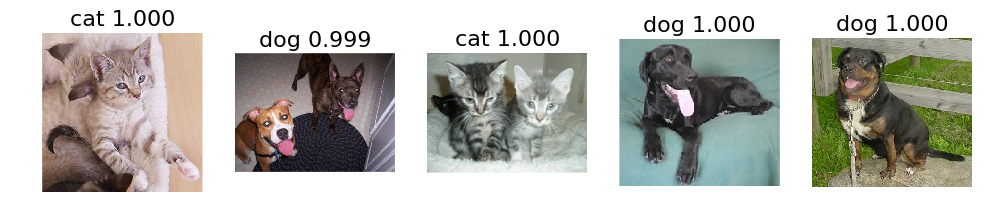

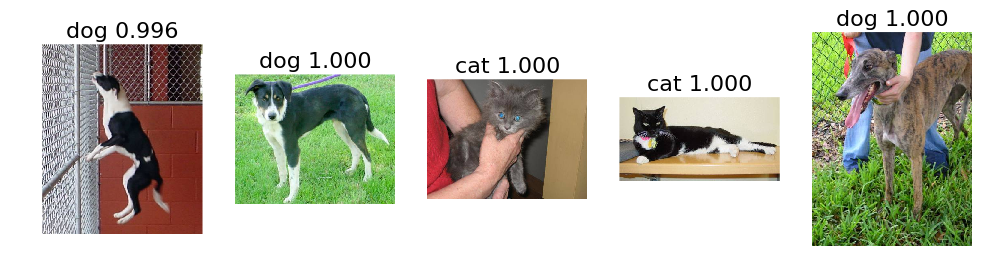

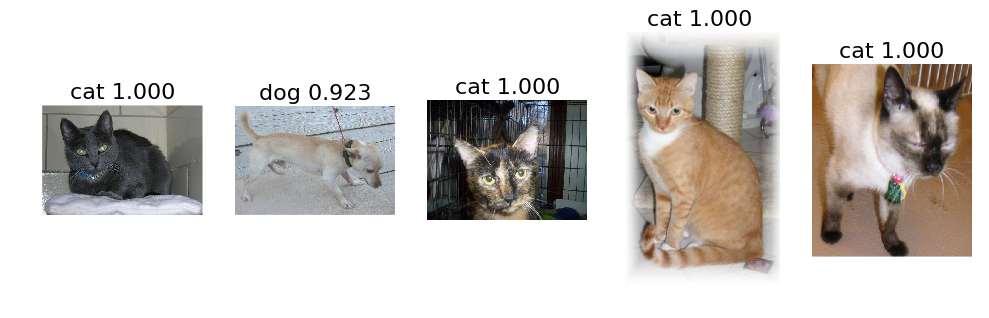

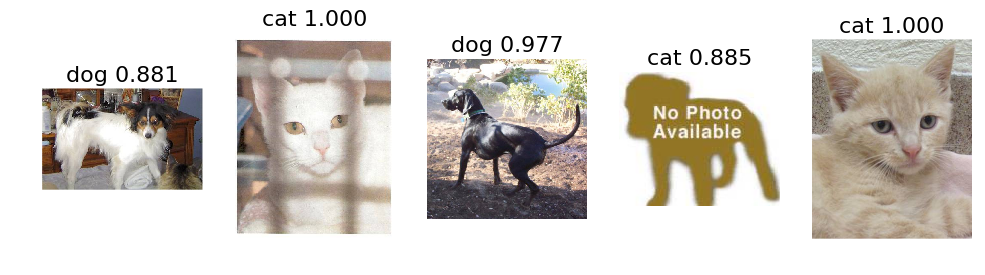

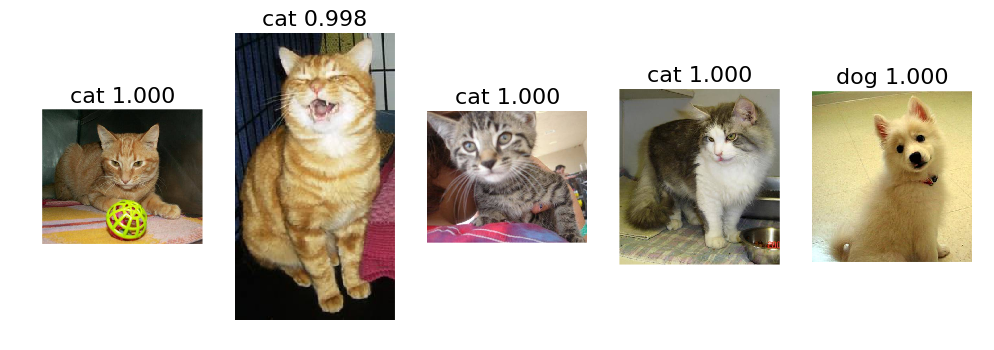

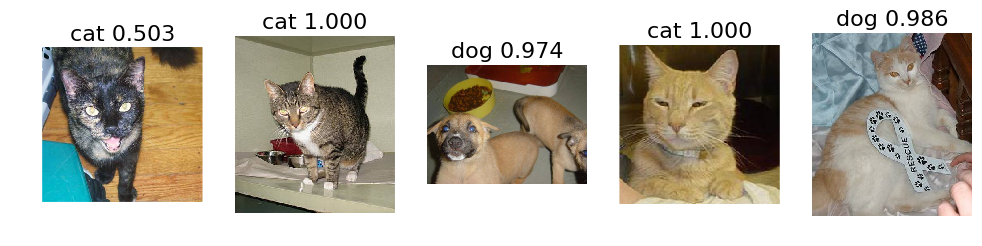

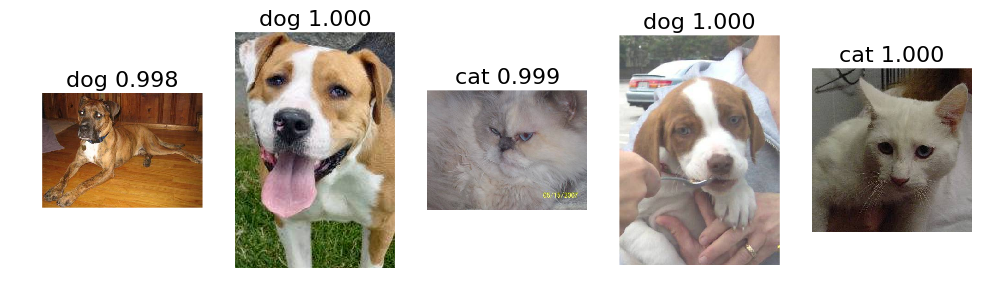

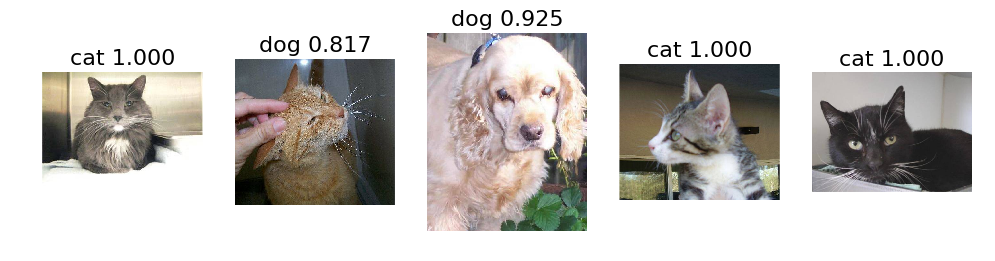

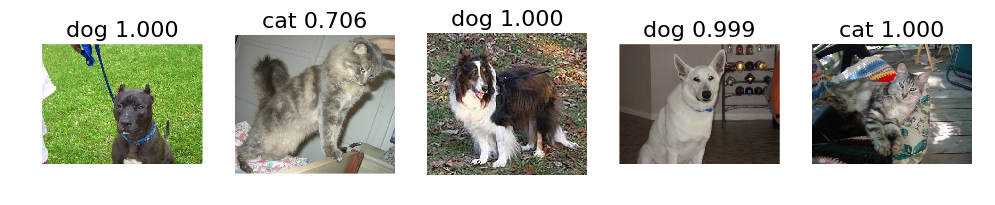

In [86]:
#https://github.com/fastai/courses/blob/master/deeplearning1/nbs/dogs_cats_redux.ipynb
#from utils import plots
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
def plots_idx(idx, titles=None):
    plots([image.load_img("data/test/" + filenames[i]) for i in idx], titles=titles)

isdog = preds[:,1]

for i in range(0, 100, 5):
  plots_idx(list(range(i, i + 5)), ["dog %1.3f"%p if p >= 0.5 else "cat %1.3f"%(1-p) for p in isdog[i:i+5] ])

In [93]:
isdog_clipped = isdog.clip(min=0.05, max=0.95)
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
subm = np.stack([ids,isdog_clipped], axis=1)
subm[:5]

array([[  4.04900000e+03,   9.49999988e-01],
       [  1.10420000e+04,   5.00000007e-02],
       [  7.69000000e+02,   9.49999988e-01],
       [  8.04500000e+03,   9.49999988e-01],
       [  3.31500000e+03,   9.49999988e-01]])

In [94]:
from IPython.display import FileLink

np.savetxt(PATH + "results/submission2.csv", subm, fmt='%d,%.5f', header='id,label', comments='')
FileLink(PATH + "results/submission2.csv")


/home/ikeyasu/work/til/cnn_dogs_cats/data/results/submission2.csv